This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [2]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = 'AoUk6maioUBcAV_Am2XQ'

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [152]:
# First, import the relevant modules
import requests
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [153]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned

r_one_day = requests.get('https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2019-09-23&end_date=2019-09-23&api_key=AoUk6maioUBcAV_Am2XQ')

In [154]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure

r_one_day.json()['dataset']

{'collapse': None,
 'column_index': None,
 'column_names': ['Date',
  'Open',
  'High',
  'Low',
  'Close',
  'Change',
  'Traded Volume',
  'Turnover',
  'Last Price of the Day',
  'Daily Traded Units',
  'Daily Turnover'],
 'data': [['2019-09-23',
   103.1,
   105.1,
   102.8,
   103.8,
   None,
   69848.0,
   7263194.5,
   None,
   None,
   None]],
 'database_code': 'FSE',
 'database_id': 6129,
 'dataset_code': 'AFX_X',
 'description': 'Stock Prices for Carl Zeiss Meditec (2019-09-11) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
 'end_date': '2019-09-23',
 'frequency': 'daily',
 'id': 10095370,
 'limit': None,
 'name': 'Carl Zeiss Meditec (AFX_X)',
 'newest_available_date': '2019-09-25',
 'oldest_available_date': '2000-06-07',
 'order': None,
 'premium': False,
 'refreshed_at': '2019-09-25T22:18:20.669Z',
 'start_date': '2019-09-23',
 'transform': None,
 'type': 'Time Series'}

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [159]:
# Question1

# Coolecting data using requests package
r = requests.get('https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2017-01-01&end_date=2017-12-31&api_key=AoUk6maioUBcAV_Am2XQ')

In [160]:
# Question2

# Convert the returned JSON object into a Python dictionary.
data_as_dict = r.json()
type(data_as_dict)

dict

Lowest opening price in 2017: 34.0
Highest opening price in 2017: 53.11


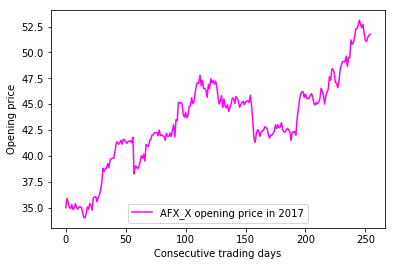

In [161]:
# Question3

# Assigning data a new variable, as list of lists.
data = r.json()['dataset']['data']

# Using list comprehensions accessing opening price values in each list and generating opening price list.
open_price = [data[i][1] for i in range(len(data))]

# Replacing None values by "backfilling"
for i in range(1, len(open_price)):
    if open_price[i] == None:
        open_price[i] = open_price[i-1]

print('Lowest opening price in 2017: ' + str(min(open_price)))        
print('Highest opening price in 2017: ' + str(max(open_price)))

# As the dates are in the reverese order, reversing the open_price
open_price.reverse()

# Plotting opening price as a functions of consecutive trading days in 2017 
plt.plot([i for i in range(len(data))], open_price, color='magenta', label='AFX_X opening price in 2017')

# Add a legend at the lower center
plt.legend(loc = 'lower center')

# Add axis labels and title
plt.xlabel('Consecutive trading days')
plt.ylabel('Opening price')
plt.show()

The largest change in any one day (based on High and Low price) in 2017: 2.81


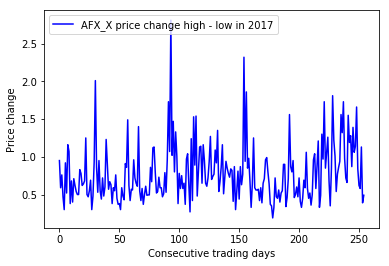

In [162]:
# Question4

# Using list comprehensions producing lists for high and low prices throughout the year.
# Converting to numpy arrays to use vectorization to compute change in prices for each day = high - low
high_price = np.array([data[i][2] for i in range(len(data))])
low_price = np.array([data[i][3] for i in range(len(data))])
change = high_price - low_price

print('The largest change in any one day (based on High and Low price) in 2017: ' \
      + str(max(change)))  

# Plotting change in prices for each day as a function of consecutive trading days in 2017
plt.plot([i for i in range(len(data))], np.flip(change, 0), color='blue',\
         label='AFX_X price change high - low in 2017')

# Add a legend at the lower center
plt.legend(loc = 'upper left')

# Add axis labels and title
plt.xlabel('Consecutive trading days')
plt.ylabel('Price change')
plt.show()

The largest change between any two days (based on Closing Price) in 2017: 1.7199999999999989


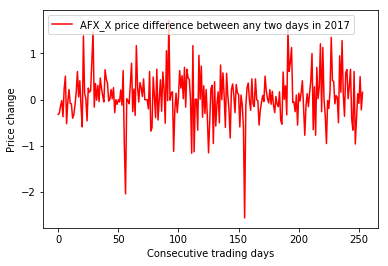

In [163]:
# Question5

# Using list comprehensions producing list of close prices
close_price = [data[i][4] for i in range(0, len(data))]

# Reversing the list, as dates are in reversed order.
close_price.reverse()

# Calculating a price difference between any two days.
close_price_diff = [close_price[i] - close_price[i-1] for i in range(1, len(data))]

print('The largest change between any two days (based on Closing Price) in 2017: ' \
      + str(max(close_price_diff)))  

# Plotting change in prices between any two days as a function of consecutive trading days in 2017
plt.plot([i for i in range(len(data)-1)], close_price_diff, color='red', \
         label='AFX_X price difference between any two days in 2017')

# Add a legend at the lower center
plt.legend(loc = 'upper left')

# Add axis labels and title
plt.xlabel('Consecutive trading days')
plt.ylabel('Price change')
plt.show()

In [164]:
# Question6

# Using list comprehensions producing list of traded volumes in 2017
traded_volume = [data[i][6] for i in range(0, len(data))]

# Calculating mean
mean_traded_volume = mean(traded_volume)

print('The average daily trading volume during 2017: ' + str(mean_traded_volume))  

The average daily trading volume during 2017: 89124.33725490196


In [165]:
# Question7

# Median function
def median(numbers):
    if len(numbers) < 1:
        return None
    elif len(numbers) % 2 == 1:
        return sorted(numbers)[len(numbers)//2]
    else:
        return float(sorted(numbers)[len(numbers)//2] + sorted(numbers)[len(numbers)//2 - 1])/2
    
print('The median daily trading volume during 2017: ' + str(median(traded_volume)))  

The median daily trading volume during 2017: 76286.0
